<a href="https://colab.research.google.com/github/afirdousi/pytorch-basics/blob/main/001_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.Check NVIDIA GPU Details
2.Import fundamental packages
3.Check pytorch version
4.Creating differnt types of tensors




In [ ]:
#check which GPU you have (SMI = System Management Interface)
!nvidia-smi

Thu Aug 17 05:38:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [87]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.3.1


In [172]:
# Creating dummy input data
x_data = np.array([1,2,3,4,5])

# Creating dummy output data (labels)
y_data = x_data * 2

In [89]:
print(x_data)
print(y_data)

[1 2 3 4 5]
[ 2  4  6  8 10]


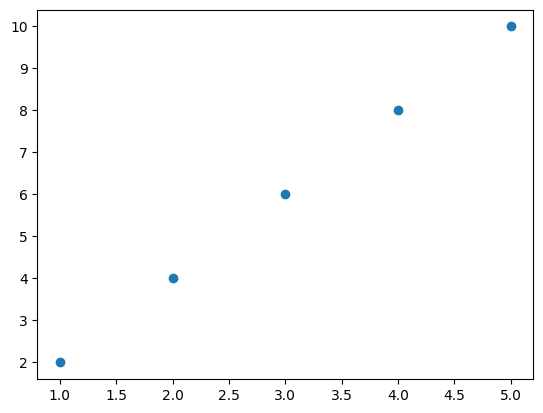

In [90]:
plt.scatter(x_data,y_data)

In [91]:
# forward pass
def forward(x, weight, bias = 0):
    y_hat = x * weight + bias
    return y_hat

In [92]:
# loss function
def loss(y_hat, y):
    return (y_hat - y) ** 2 # squared error (not the mean squared error)

In [93]:
all_weights = []
all_loss = []

### initialize weights with random numbers 
### just loop from 0 to 4 stepping by 0.1
for weight in np.arange(0,4,0.1): 
    l_sum = 0

    for i in range(len(x_data)):
        y_hat = forward(x_data[i], weight)
        l = loss(y_hat, y_data[i])

        l_sum += l

    all_weights.append(weight)
    all_loss.append(l_sum/ len(y_data))

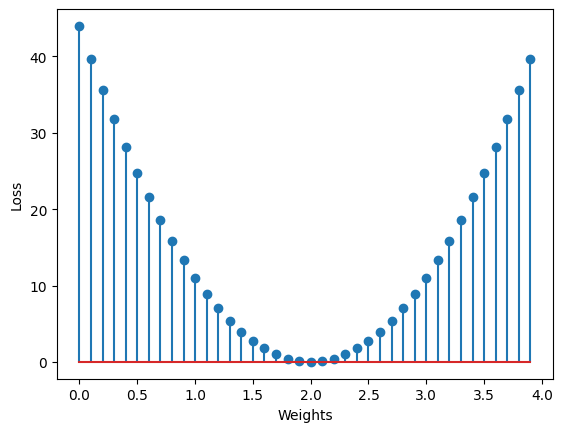

In [94]:
plt.stem(all_weights, all_loss) # x-axis =  , y-axis = loss
plt.xlabel('Weights')
plt.ylabel('Loss')
plt.show()

# as weight approaches to 2, the loss is getting smaller and smaller. the min loss is when weight=2

# Linear Regression Using PyTorch constructs (tensors, gradients etc.)

In [117]:
### Let's do the above in PyTorch using Linear Regression Model

x_torch = torch.tensor(x_data).reshape(-1,1)
y_torch = torch.tensor(y_data).reshape(-1,1)

In [96]:
x_torch

tensor([[1],
        [2],
        [3],
        [4],
        [5]])

In [97]:
y_torch

tensor([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]])

In [98]:
weight = torch.randn(1, requires_grad=True) # requires_grad helps us automatically create gradients for us
bias = torch.randn(1, requires_grad=True)

In [99]:
weight

tensor([0.8352], requires_grad=True)

In [100]:
bias

tensor([-0.4706], requires_grad=True)

In [101]:
learning_rate = 0.01

In [102]:
# Training Model

for i in range(1000): # Training Loop: train model 1000 times

    # Predict
    y_hat = x_torch * weight + bias 

    # Calculate Loss
    loss = torch.sum(torch.pow(y_torch - y_hat,2)/ len(y_torch)) # Mean Squared Error (MSE)

    # Do backpropagation
    loss.backward() # automatically calculates gradients for us

    # Now lets do something with the gradients
    with torch.no_grad(): # stop calculating gradient
        # update weights and biases
        weight -= learning_rate * weight.grad
        bias -= learning_rate * bias.grad

        # stop accumulation of gradients
        weight.grad.zero_()
        bias.grad.zero_()

In [103]:
# Make prediction with the model
y_pred = x_torch * weight + bias

In [104]:
# Lets check if our models predictions is correct by checking y_pred and y_data
print(y_pred)
print(y_data)

tensor([[ 1.9966],
        [ 3.9979],
        [ 5.9992],
        [ 8.0005],
        [10.0018]], grad_fn=<AddBackward0>)
[ 2  4  6  8 10]


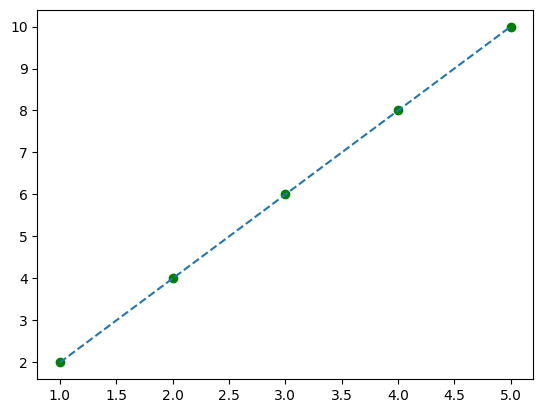

In [105]:
plt.plot(x_torch, y_torch, 'go') # green dots = original points
plt.plot(x_torch, y_pred.detach().numpy(),'--') # blue line = our model predictions 
# had to detach() and convert into numpy array for matplotlib

In [106]:
# Now we want to understand the performance of our loss function and how weights are changing over the training period

# Updated Training Model Code

all_weights = []
all_loss = []

for i in range(1000):
    y_hat = x_torch * weight + bias 
    loss = torch.sum(torch.pow(y_torch - y_hat,2)/ len(y_torch))
    loss.backward()
    
    with torch.no_grad():
        weight -= learning_rate * weight.grad
        bias -= learning_rate * bias.grad
        weight.grad.zero_()
        bias.grad.zero_()

    # Append the detached loss value to prevent the gradient issue
    all_weights.append(weight.item())  # Convert weight to a scalar
    all_loss.append(loss.detach().numpy())  # Detach loss from the graph and convert to numpy

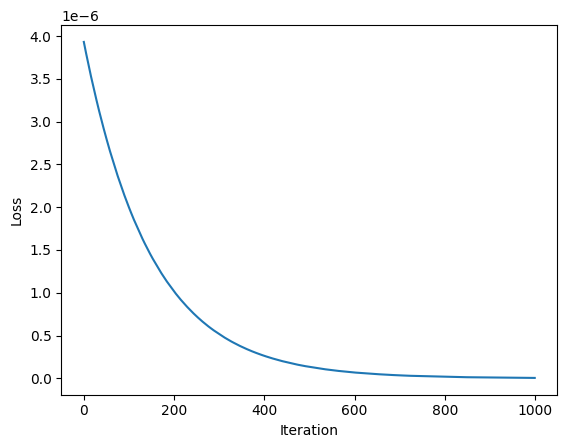

In [111]:
# Visualize loss over training time
plt.plot(np.arange(0, 1000, 1), all_loss[:1000])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

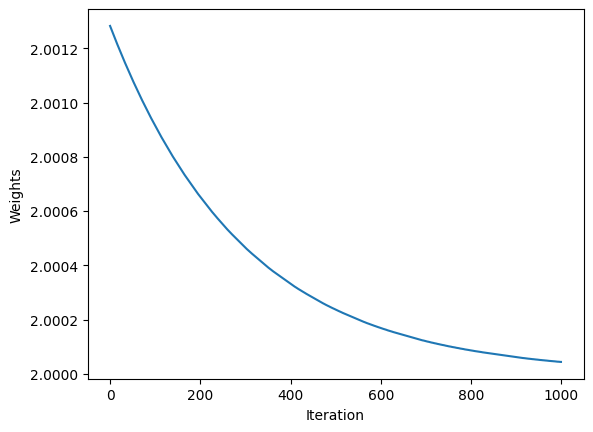

In [112]:
# Visualize weights over training time
plt.plot(np.arange(0, 1000, 1), all_weights[:1000])
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.show()

In [114]:
weight, bias

(tensor([2.0000], requires_grad=True), tensor([-0.0002], requires_grad=True))

In [116]:
# Observe that weight = 2 and bias~= 0

# Meaning the relationship between independant variable x and dependant variable y is *2 i.e any y will is double the x
# Which is exactly the case in our dummy data 

# Let's test our model with new data
x_test = torch.tensor([3.5,10])
y_test = x_test * weight + bias

y_test

tensor([ 7.0000, 20.0003], grad_fn=<AddBackward0>)

# Linear Regression Model in PyTorch (Full Implementation)

In [152]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        
        # Since its a linear model, it will have 1 layer
        self.linear = torch.nn.Linear(in_features = 1, out_features = 1) # (input size, output size)

    def forward(self, x):
        return self.linear(x)

In [153]:
model = LinearModel()

In [154]:
# Lets test our model with more complex set of numbers

x = np.random.rand(500)
x = x * 10
x

array([5.59200867, 2.24672486, 6.74475304, 9.82157391, 7.96766299,
       1.46974725, 9.76722828, 7.53682198, 9.03357215, 6.93742536,
       4.58683639, 4.52460972, 2.01491779, 7.04744437, 2.05747928,
       6.29451991, 2.05756007, 5.76663944, 6.28022145, 6.13287791,
       5.67184277, 7.8572814 , 2.25786804, 5.98972264, 5.4191014 ,
       7.56574145, 0.27667988, 9.55543033, 5.47058347, 2.07176777,
       8.28750831, 6.53562393, 2.15683245, 6.67341554, 8.56276408,
       7.01805137, 9.89743692, 0.41414931, 6.56650414, 1.79232822,
       5.47343038, 8.73415014, 3.2539591 , 7.221044  , 9.0664415 ,
       1.58358731, 7.66338755, 5.83708058, 4.70802803, 4.54294419,
       2.96060541, 4.95221522, 4.14916824, 1.17567261, 6.35554666,
       4.76795633, 8.44731135, 1.83576321, 2.61006777, 0.81698147,
       7.36574098, 2.77185096, 0.25302416, 4.6607945 , 1.62119988,
       0.75506027, 3.8752722 , 5.49505301, 9.94721104, 2.93537186,
       3.04301676, 6.54873229, 8.67227292, 1.07987717, 1.47834

In [155]:
# Modeling a Equation

y = x * 3  - 4
y += np.random.randn(500)

In [156]:
y

array([13.69213387,  2.60245124, 15.46850237, 25.24859384, 21.37098638,
        0.78682232, 25.73477065, 17.62165871, 22.38818239, 16.51706789,
        9.59755498,  9.88442167,  2.39576808, 16.92457588,  2.38770919,
       14.65271868,  2.08486462, 13.12145859, 15.63523615, 14.18028277,
       14.45771105, 19.83174661,  1.92144888, 14.24331417, 13.63840435,
       19.15611869, -2.12279648, 22.63028448, 11.60148088,  3.7540339 ,
       21.380693  , 16.08913228,  3.53269209, 15.96426051, 20.97241788,
       19.36938843, 25.06767573, -3.01885982, 14.68084989,  3.7715601 ,
       12.78694754, 21.30196531,  4.77426642, 17.16023571, 25.33718474,
        1.9599612 , 18.36958341, 14.04299194,  9.91434083, 11.03195359,
        5.31269753, 11.2807813 ,  7.41449524,  1.10724084, 15.42602078,
       10.37169923, 19.60280995,  3.03380425,  3.9671436 , -1.58039176,
       17.44291431,  4.11540811, -3.70126535,  9.96365419,  0.90928196,
       -1.65355322,  7.65030345, 11.92936   , 25.59257537,  6.28

In [164]:
# Remember PyTorch only accepts tensors, our input and output right now are numpy arrays

# Convert numpy arrays to PyTorch tensors (float32) because weights and biases are double tensors (check without .float())
x_torch = torch.tensor(x).reshape(-1, 1).float()  # Convert to float32
y_torch = torch.tensor(y).reshape(-1, 1).float()  # Convert to float32

In [165]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.01)

In [166]:
# Model training 
all_losses = []
for epoch in range(500):
    y_hat = model(x_torch)
    loss = criterion(y_hat,y_torch)
    loss.backward()
    all_losses.append(loss.item())

    optimizer.step()
    optimizer.zero_grad()

    # Print loss every 50 epochs for monitoring
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.9363919496536255
Epoch 50, Loss: 0.9161648154258728
Epoch 100, Loss: 0.9035096168518066
Epoch 150, Loss: 0.8955917954444885
Epoch 200, Loss: 0.8906378149986267
Epoch 250, Loss: 0.8875383734703064
Epoch 300, Loss: 0.8855991363525391
Epoch 350, Loss: 0.8843858242034912
Epoch 400, Loss: 0.8836266994476318
Epoch 450, Loss: 0.8831518292427063


In [167]:
# Prediction on Test Set
y_pred = model.forward(x_torch)

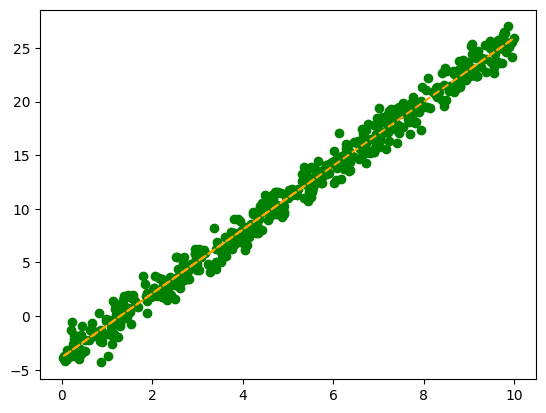

In [168]:
plt.plot(x_torch, y_torch, 'go')
plt.plot(x_torch, y_pred.detach().numpy(), '--', color = 'orange')

In [169]:
# Let's now check the weights and biases of this model

for name, param in model.named_parameters():
    print(name, param)

linear.weight Parameter containing:
tensor([[2.9749]], requires_grad=True)
linear.bias Parameter containing:
tensor([-3.8400], requires_grad=True)


[]

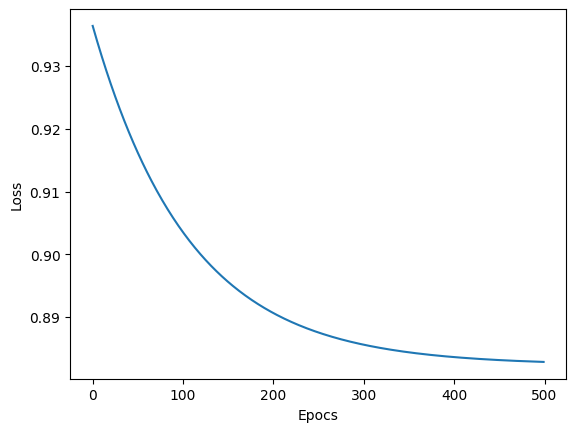

In [171]:
# Let's check model performance by plotting Loss
plt.plot(np.arange(0,500,1), all_losses[:500])
plt.xlabel("Epocs")
plt.ylabel("Loss")
plt.plot()